# Example notebook using the event display for the IWCD mPMT CNN dataset

This notebook uses the IWCD geometry uses mPMTs, for the mPMT CNN dataset.

The same setup and code should work for other detectors using the mPMT CNN dataset, e.g. for WCTE, with minimal modifications.


Plot are included of example events in 2D and 3D, and plots of variables related to the detector geometry to check that the mapping to the CNN image appears correct.

## Imports and setup

First change some display settings for the notebook

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [2]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [3]:
import sys
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# either add WatChMaL repository directory to PYTHONPATH environment variable or add it here
sys.path.append('/home/Antoine.m/watchmal_time/WatChMaL')
sys.path.append('/home/Antoine.m')

External imports:

In [5]:
import torch
import numpy as np
import pandas as pd
from watchmal.dataset.cnn_mpmt.cnn_mpmt_dataset import CNNmPMTDataset
#from watchmal.model.sinkhornAE import Autoencoder
import main
from hydra.utils import instantiate, to_absolute_path
import hydra
from omegaconf import OmegaConf

/home/Antoine.m/watchmal_time/WatChMaL/main.py:24: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='config/', config_name='resnet_train')


## Set up event display with dataset

Create an instance:

In [6]:
dataset = CNNmPMTDataset(h5file='/home/pdeperio/machine_learning/data/IWCD_mPMT_Short/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5',
                                    mpmt_positions_file='/home/pdeperio/machine_learning/data/IWCDshort_mPMT_image_positions.npz', mode = ["charge","time"], is_distributed= False)

In [7]:
# pos_x = []
# pos_y = []
# import seaborn as sns
# import pandas as pd
# for channel in range(19):
#     channel = channel % 19
#     theta = (channel < 12)*2*np.pi*channel/12 + ((channel >= 12) & (channel < 18))*2*np.pi*(channel-12)/6
#     radius = 1*(channel < 18) + 1*(channel < 12)
#     position = np.column_stack((radius*np.sin(theta), radius*np.cos(theta)))
#     if position[0][0]>0:
#         pos_x.append(position[0][0])
#     else :
#         pos_x.append(position[0][0])
    
#     if position[0][1]>0:
#         pos_y.append(position[0][1])
#     else :
#         pos_y.append(position[0][1])
# df = pd.DataFrame()
# df["x"] = pos_x
# df["y"] = pos_y
# df['labels'] = range(19)
# print(df)
# fig = plt.figure(figsize = (12,12))
# sns.scatterplot(x = 'x', y = "y", hue = "labels", data = df, palette = "tab20")
# plt.show()
# plt.clf()
# fig = plt.figure(figsize = (12,12))
# coords_list = np.array([[2,4], [3,4], [4,3], [4,2], [4,1], [3,0], [2,0], [1,0], [0,1], [0,2], [0,3], [1,4], [2,3], [3,3], [3,1], [2,1], [1,1], [1,3], [2,2]])
# df["x"] = coords_list[:,0]
# df["y"] = coords_list[:,1]

# sns.scatterplot(x = 'x', y = "y", hue = "labels", data = df, palette = "tab20")

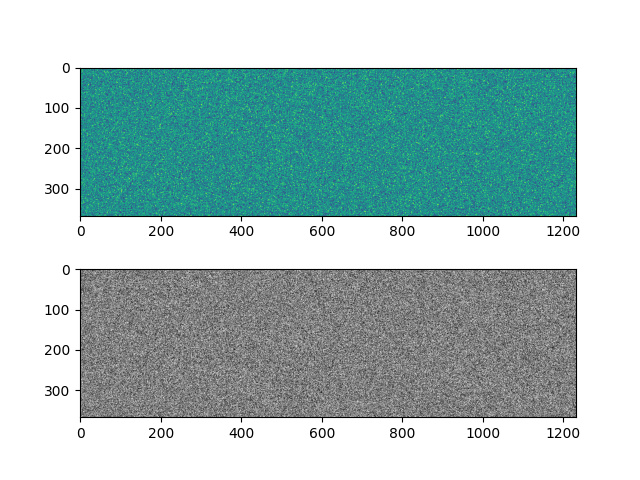

In [8]:
from numpy import random
from matplotlib import animation
import matplotlib.pyplot as plt

img_lst_1 = [random.random((368,1232)) for i in range(10)] # Test data
img_lst_2 = [random.random((368,1232)) for i in range(10)] # Test data

fig, (ax1, ax2) = plt.subplots(2,1)
frames = [] # store generated images
for i in range(len(img_lst_1)):
    
    img1 = ax1.imshow(img_lst_1[i], animated=True)
    img2 = ax2.imshow(img_lst_2[i], cmap='gray', animated=True)
    
    frames.append([img1, img2])

ani = animation.ArtistAnimation(fig, frames, interval=20, blit=True,
                                repeat_delay=1000)
plt.show()
writergif = animation.PillowWriter(fps=30)
ani.save('movie_example.gif', writer = writergif)

In [9]:
coords_list = np.array([[2,4], [3,4], [4,3], [4,2], [4,1], [3,0], [2,0], [1,0], [0,1], [0,2], [0,3], [1,4], [2,3], [3,3], [3,1], [2,1], [1,1], [1,3], [2,2]])

def reshape5x5(m_vals):
        out = torch.zeros(5,5)
        for k in range(len(m_vals)):
            out[coords_list[k][0],coords_list[k][1]] = m_vals[k]
        return out[None,:]

def reshape_img(data):
    t_out = torch.empty(data.shape[-2]*5,data.shape[-1]*5)
    for i in range(data.shape[-2]):
        for j in range(data.shape[-1]):
            mpmt_vals = data[:,i,j]
            #t_out[i:i+5,j:j+5] = 
            t_out[5*i:5*(i+1),5*j:5*(j+1)] = reshape5x5(mpmt_vals)
    return t_out[None,:]

tensor(24.0113)


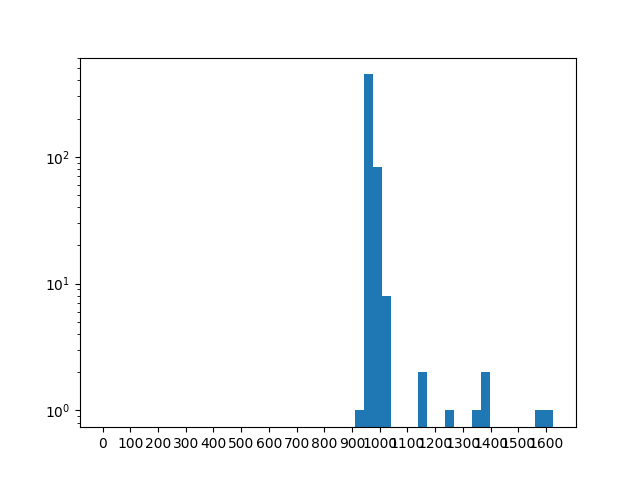

tensor(104.8701)


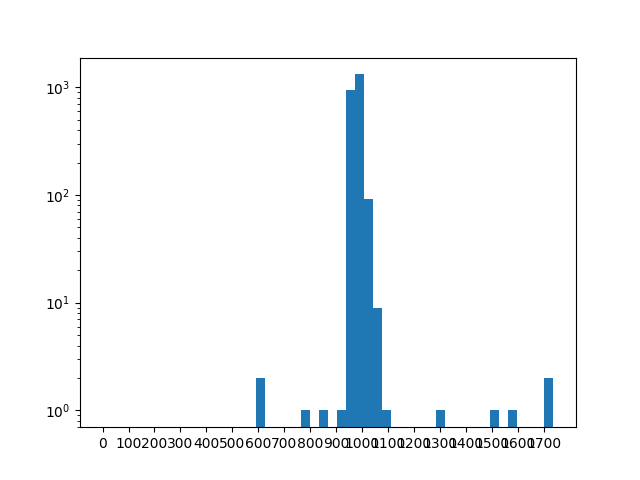

tensor(58.1319)


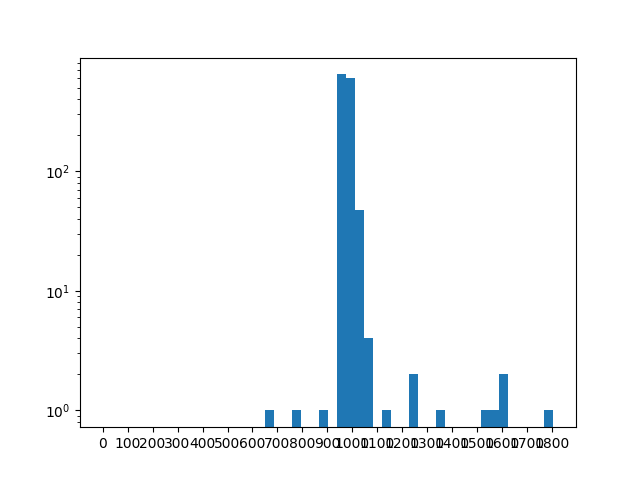

tensor(159.2455)


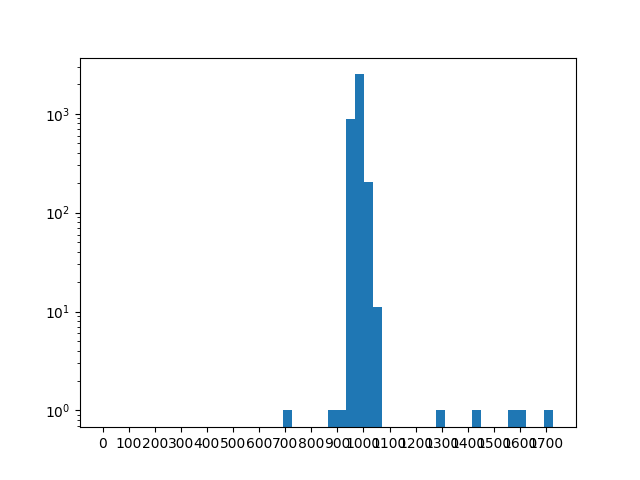

tensor(124.3009)


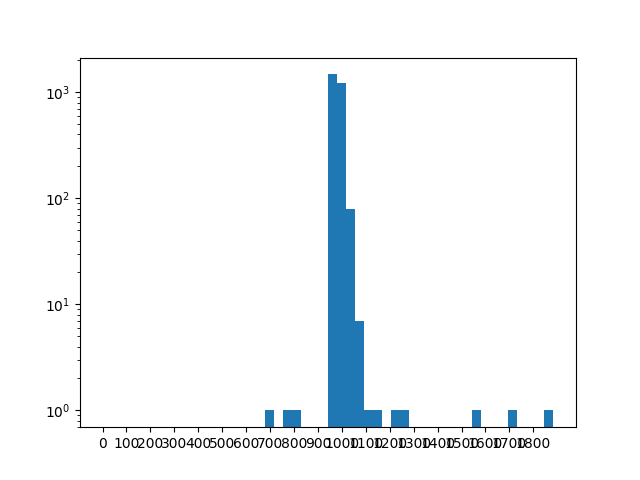

tensor(60.4805)


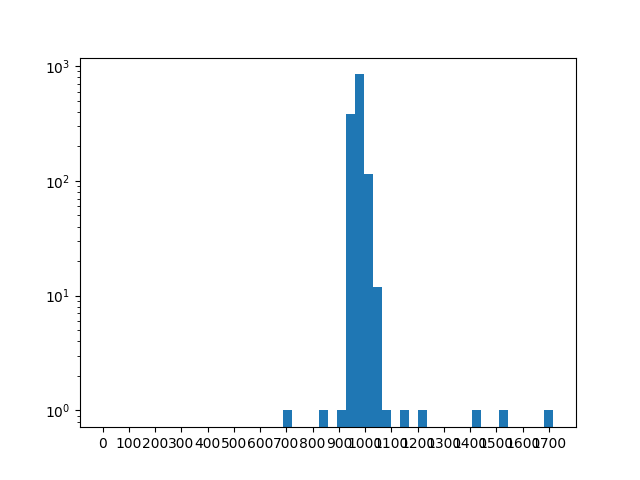

tensor(99.7621)


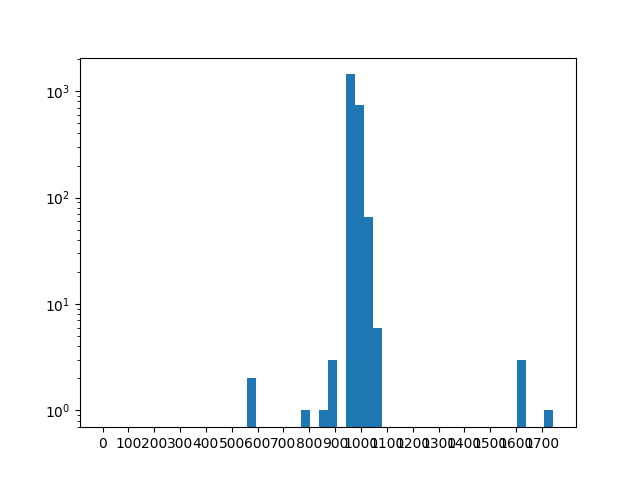

tensor(8.6243)


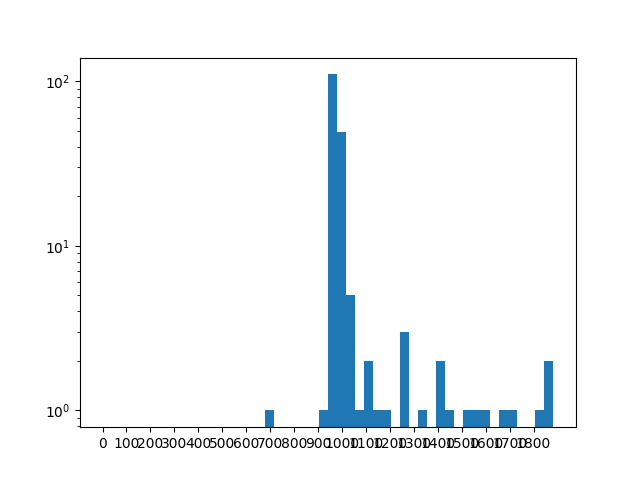

tensor(79.1939)


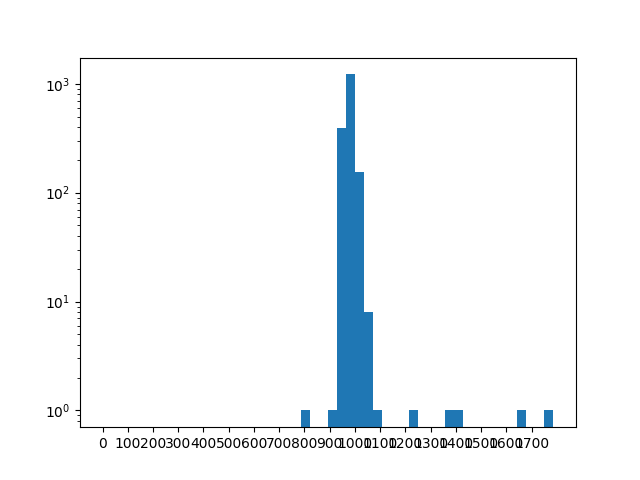

tensor(58.4508)


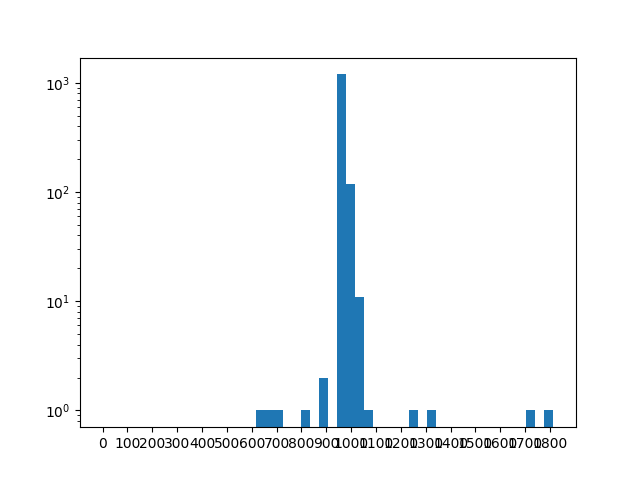

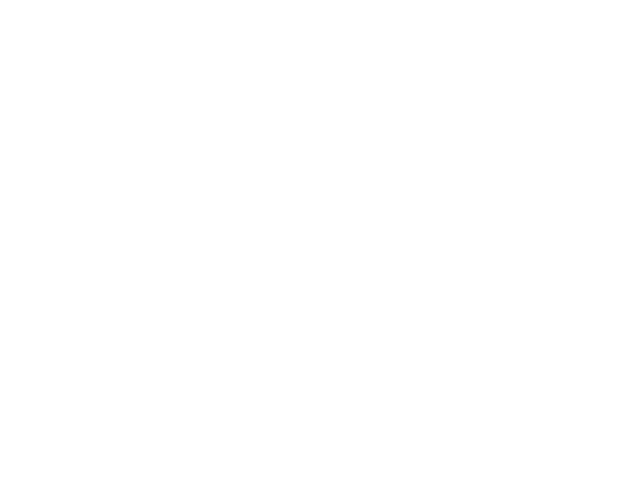

In [15]:
import matplotlib.animation as animation
dict_labels = {0 : "electron", 1 : "gamma", 2 : "muon", 3 : 'pion'}
n_events = 125
for i in range(10):
    idx = np.random.randint(0,len(dataset))
    label = dataset[idx]['labels']
    data_charge = dataset[idx]["data"][19:]
    data_time = dataset[idx]["data"][19:]
    print(torch.mean(data_time))
    mask = data_time.ge(0.001)
    mask2 = data_time.le(0.001)
    plt.hist(data_time.flatten().numpy(), range = (0.01, torch.max(data_time).item()), bins = 50)
    plt.yscale("log")
    plt.xticks(np.arange(0,torch.max(data_time).item(),100))
    plt.show()
    plt.clf()
    bins = np.linspace(700,1800,500)

    fig, ax = plt.subplots()
    frames = [] # store generated images
    for k in range(len(bins)-1):
        if k ==0:
            timestep = bins[k+1]-bins[k]
            base_tensor = torch.zeros(data_charge.shape)
        # Generate new data for each frame
        mask1 = data_time >= bins[k]
        mask2 = data_time < bins[k+1]
        masked_tensor = (data_charge * mask1) * mask2
        base_tensor += masked_tensor
        if base_tensor.count_nonzero().item() > n_events:
            img = ax.imshow(torch.log(1+reshape_img(base_tensor).squeeze(0)), animated=True)
            frames.append([img])
            base_tensor = torch.zeros(data_charge.shape)
    data_charge_g0 = mask*data_charge
    img = ax.imshow(torch.log(1+reshape_img(data_charge_g0).squeeze(0)))
    frames.append([img])
    ani = animation.ArtistAnimation(fig, frames, interval=2000, blit=True,
                                    repeat_delay=100000, repeat = False)
    plt.title(" Event %d, %s, timestep %1.2f ns, frame count %d"%(idx, dict_labels[label],timestep,len(frames)))
    
    #plt.show()
    writergif = animation.PillowWriter(fps=5)
    ani.save('gifs2d/movie_example%d.gif'%(idx), writer = writergif)
    plt.clf()

    
    # for k in range(len(bins)-1):
    #     if k ==0:
    #         print("timestep : " + str(bins[k+1]-bins[k]))
    #     mask1 = data_time >= bins[k]
    #     mask2 = data_time < bins[k+1]
    #     masked_tensor = (data_charge * mask1) * mask2
        
    #     if masked_tensor.count_nonzero().item() > 3:
            
    #         plt.imshow(torch.log(1+reshape_img(masked_tensor).squeeze(0)))
    #         plt.show()
    #         plt.clf()
                
    # #data_charge_g0 = mask*data_charge
    # #data_charge_0 = mask2*torch.ones(19,29,40)
    # data_charge_g0 = mask*data_charge
    # print("total image")
    # plt.imshow(torch.log(1+reshape_img(data_charge_g0).squeeze(0)))
    # plt.colorbar()
    # plt.show()
    # plt.clf()

In [11]:
def log_scaling(data):
    log_max_global = np.log(1+event_display.global_max)
    return event_display.log_transform(data)/log_max_global

In [12]:
max_list = []
for j in range(10):
    i = np.random.randint(0,23481549)
    arr  = np.array(event_display[i]["data"]).flatten()
    print(event_display[i]["labels"])
    plt.hist(arr, bins=25, range = (0.0000001,np.max(arr)))
    plt.show()
    #max_list.append(torch.max(event_display.norm_event(event_display[j]["data"])).item())
plt.hist(max_list)

NameError: name 'event_display' is not defined

## Set up plotting style

Set the notebook's embedded figure format

In [ ]:
%config InlineBackend.figure_formats = ['png']

Set some default matplotlib style settings

In [ ]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (15, 12)
matplotlib.rcParams["figure.autolayout"] = True

## Display events

The 2D event display plots exactly the data produced by the Dataset class and passed to the CNN. How to use it:

In [ ]:
help(CNNmPMTEventDisplay.plot_event_2d)

In [ ]:
def plot_group(elem,model):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    data = event_display.pad(elem["data"])
    
    out = model(data[None,:])
    label = elem["labels"]
    cond_vec = elem["cond_vec"]
    y_onehot = torch.FloatTensor(1, 4)
    y_onehot.zero_()
    cond_s = y_onehot.scatter_(1, torch.tensor([[label]]), 1)
    cond_s = torch.concat((cond_s,cond_vec[None,:]),dim=1)
    generated_noise = model.generate_noise(torch.rand(1, model.input_size),cond_s[0:1])
    example = model.generate(generated_noise)
    data = data.squeeze(0)
    idx = np.indices(data.shape)
    #axs[0].imshow(data.squeeze(0))
    #axs[1].imshow(out[0].detach().numpy().squeeze(0).squeeze(0))
    #axs[2].imshow(example.detach().numpy().squeeze(0).squeeze(0))
    axs[0].scatter(idx[1],idx[0], c = data, s = 15*np.log(1+data), cmap = "magma")
    axs[1].scatter(idx[1],idx[0], c = out[0].detach().numpy().squeeze(0).squeeze(0), s = 15*np.log(1+data), cmap = "magma")
    axs[2].scatter(idx[1],idx[0], c = example.detach().numpy().squeeze(0).squeeze(0), s = 15*np.log(1+data), cmap = "magma")
    plt.show()

For example, plotting event number 8 in both default and `dark_background` matplotlib styles:

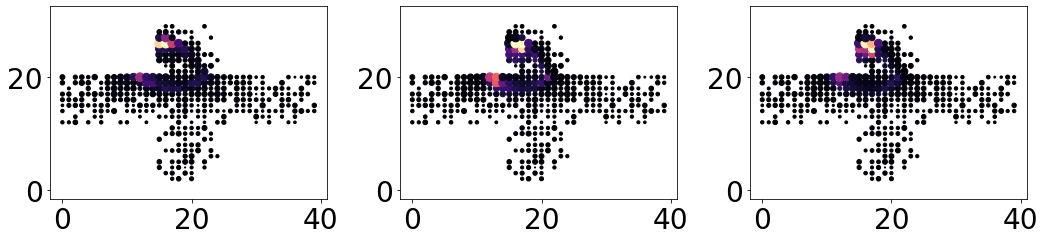

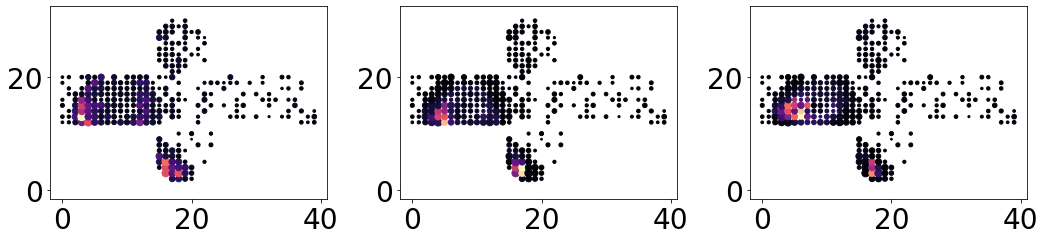

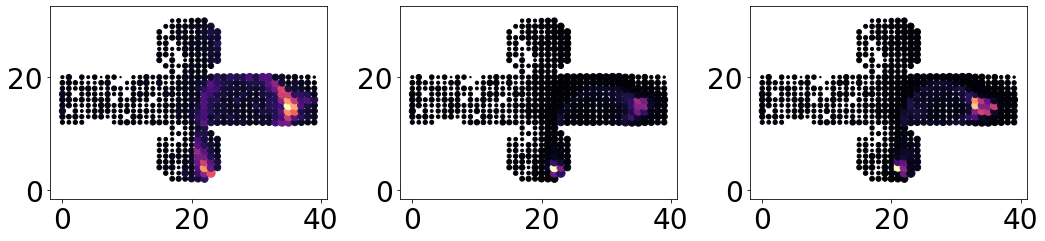

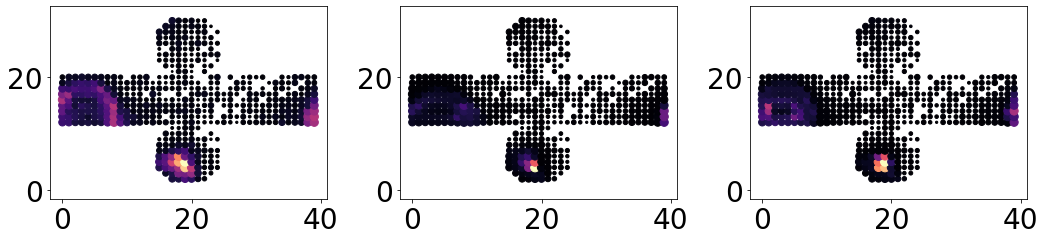

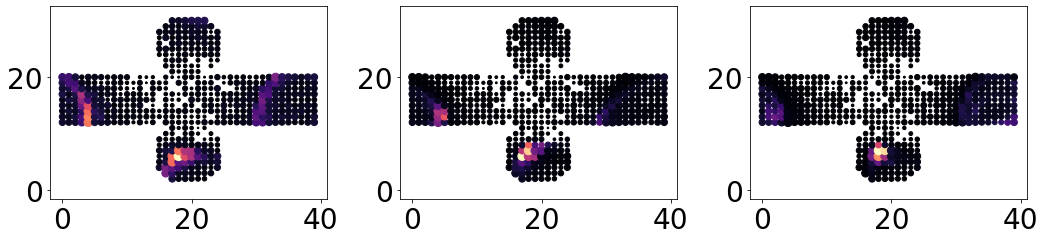

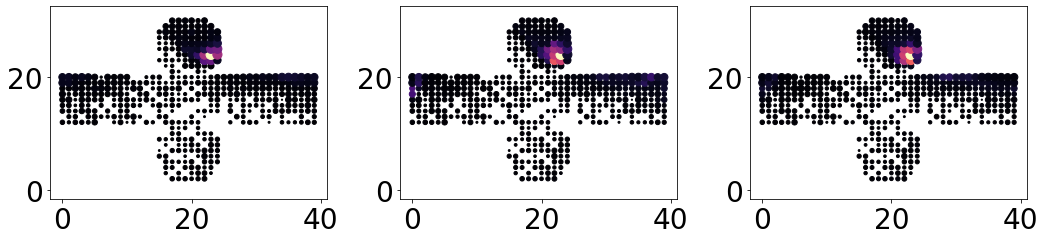

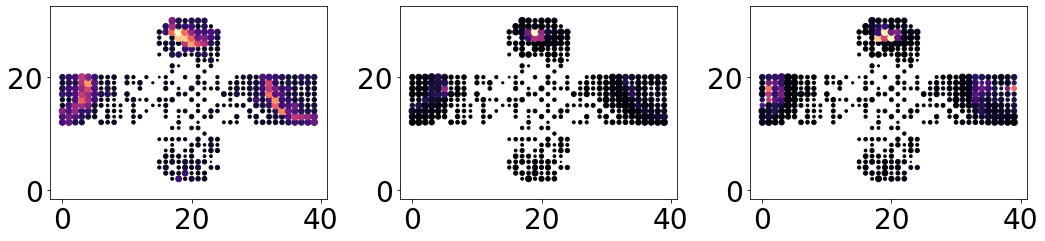

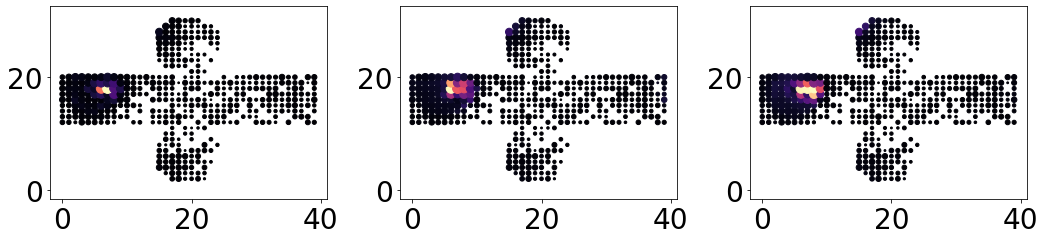

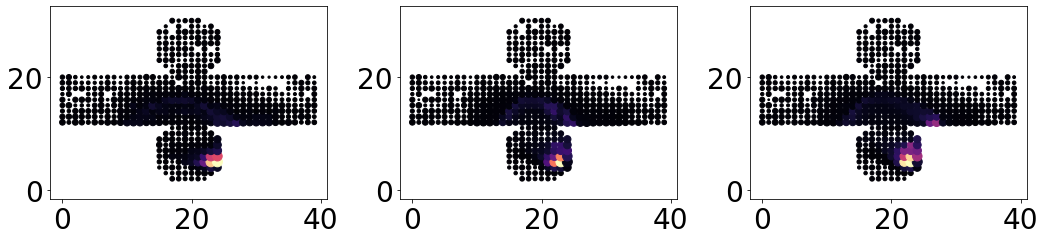

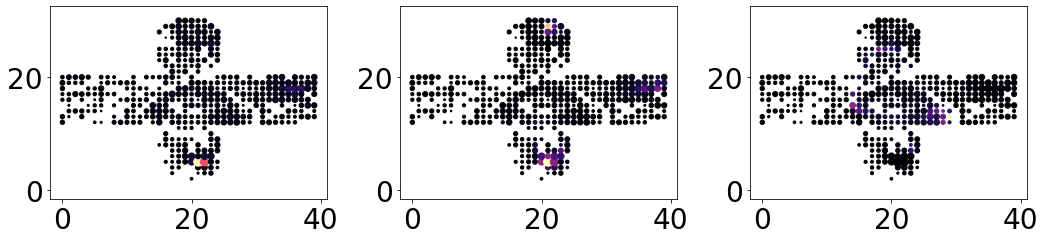

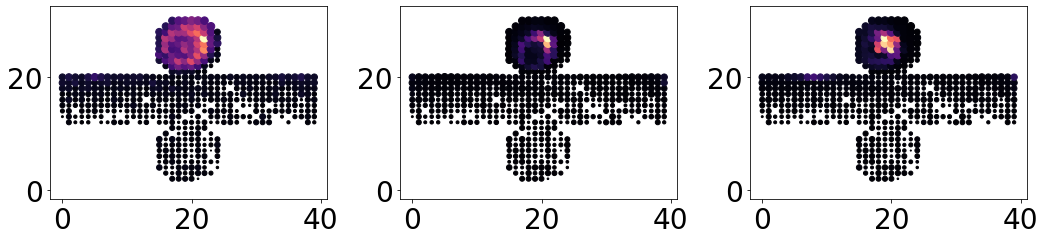

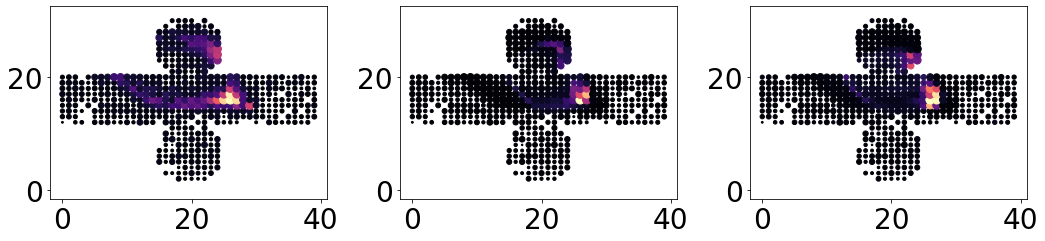

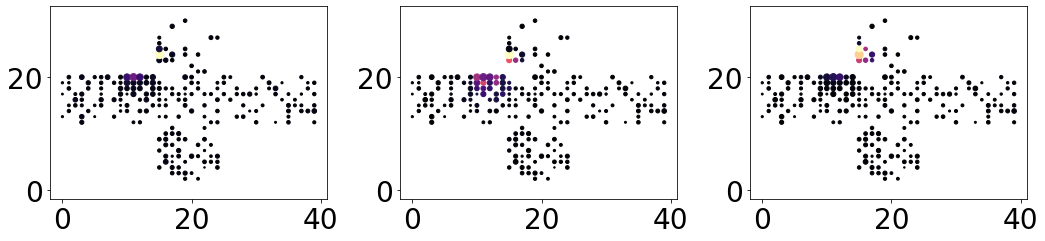

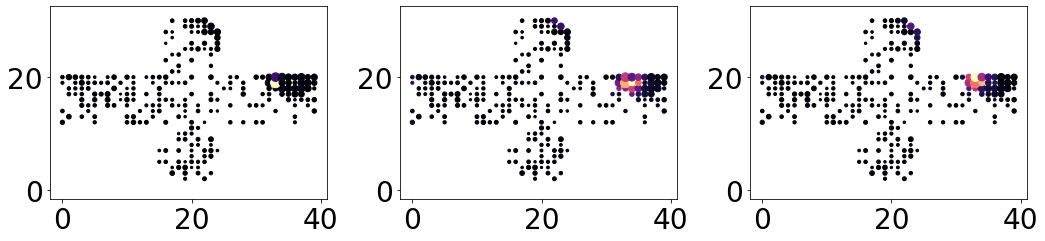

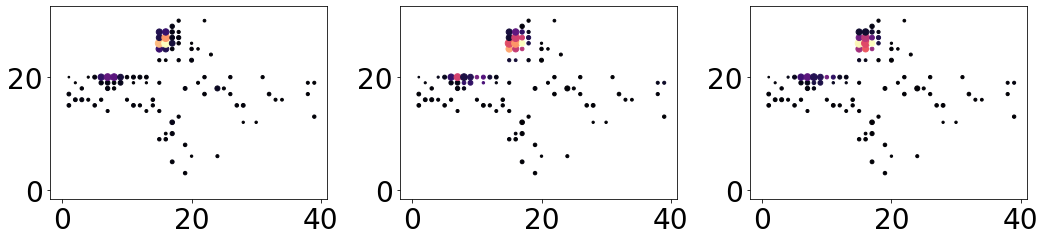

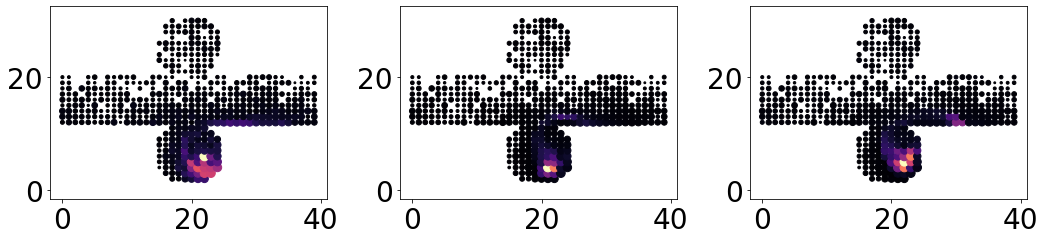

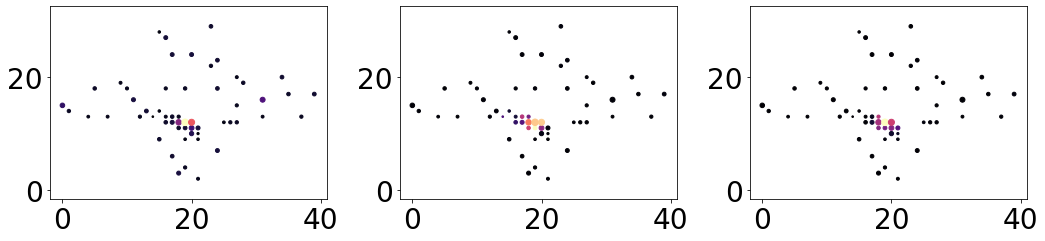

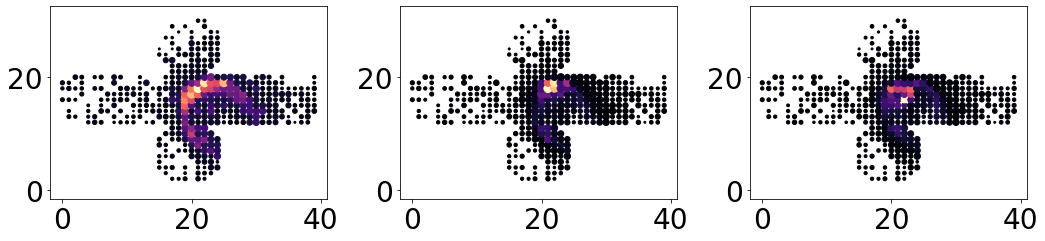

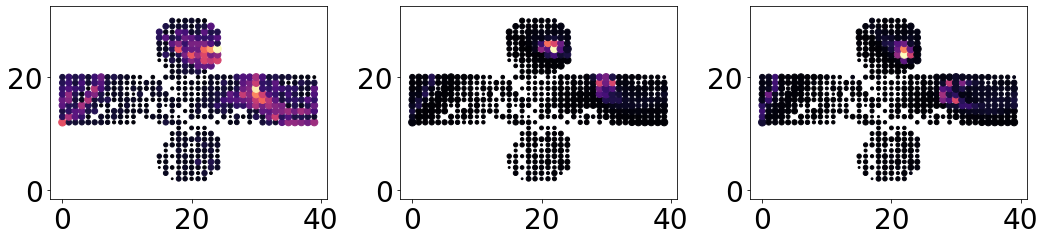

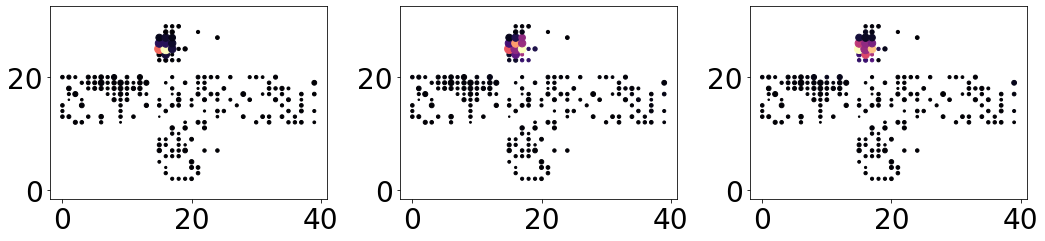

In [ ]:
import numpy as np
from matplotlib.colors import LogNorm
for i in range(20):
    event_id_to_plot = np.random.randint(0,len(event_display))
    data = event_display.pad(event_display[event_id_to_plot]["data"])
    elem = event_display[event_id_to_plot]
    plot_group(elem,model)
   
    #ax = event_display.plot_processed_event_2d(event_id_to_plot, model, color_label="Charge", title=f"Event #{event_id_to_plot}", fig_size = 132)
    #ax = event_display.plot_diff_2d(event_id_to_plot, model, color_label="Charge", title=f"Event #{event_id_to_plot}", fig_size = 133)

    #ax = event_display.plot_generated_event_2d(event_id_to_plot, model, color_label="Charge", title=f"Event #{event_id_to_plot}",fig_size = 133)
    

In [ ]:
all_zs = []
all_labels = []
for i in range(10000):
    event_id_to_plot = np.random.randint(0,len(event_display))
    elem = event_display[event_id_to_plot]
    label = elem["labels"]
    cond_vec = elem["cond_vec"]
    y_onehot = torch.FloatTensor(1, 4)
    y_onehot.zero_()
    cond_s = y_onehot.scatter_(1, torch.tensor([[label]]), 1)
    cond_s = torch.concat((cond_s,cond_vec[None,:]),dim=1)
    generated_noise = model.generate_noise(torch.rand(1, model.input_size),cond_s[0:1])
    all_zs.append(generated_noise.detach().numpy())
    all_labels.append(label)

In [ ]:
from notebooks.tsne_clustering import TSNEclustering

In [ ]:
clusters = TSNEclustering(np.array(all_zs).squeeze(1),np.array(all_labels))

In [ ]:
clusters.perform_tsne()

starting_tsne


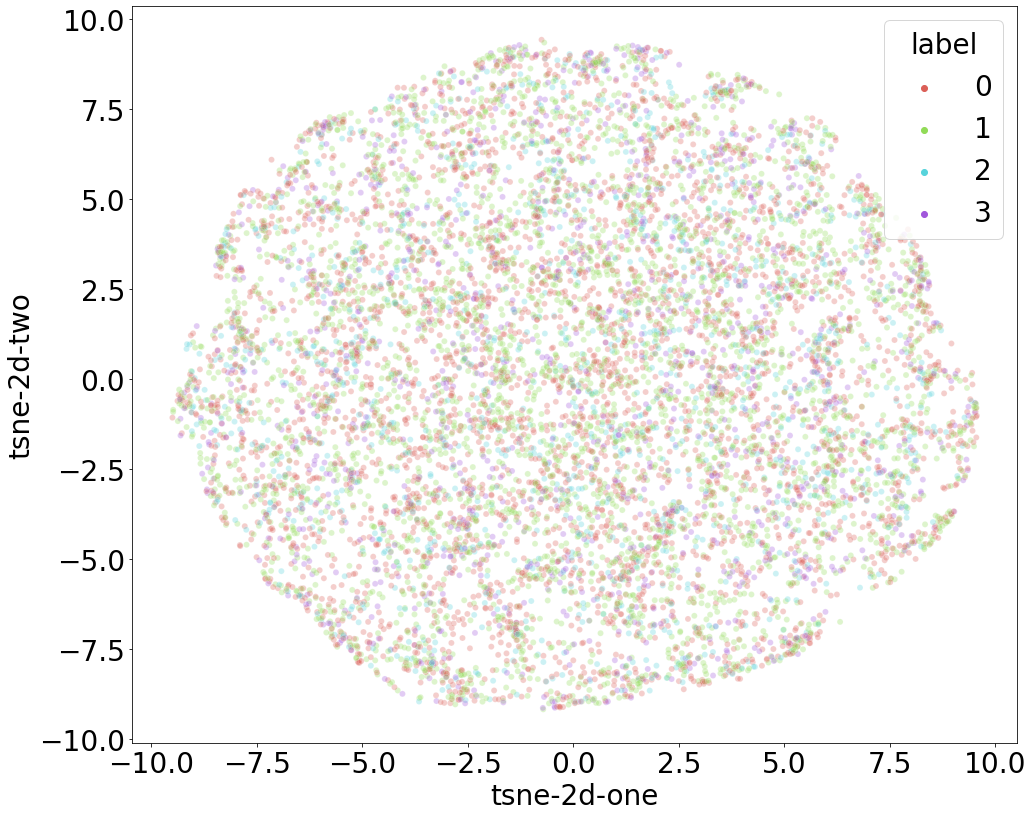

In [ ]:
clusters.plot_result()

And with some transformations applied to the data before plotting:

In [ ]:
fig, ax = event_display.plot_event_2d(event_id_to_plot, color_label="Charge",
                                      title=f"Event #{event_id_to_plot} double cover",
                                      transformations="double_cover")
fig, ax = event_display.plot_event_2d(event_id_to_plot, color_label="Charge",
                                      title=f"Event #{event_id_to_plot} flipped horizontally and vertically",
                                      transformations=["horizontal_flip", "vertical_flip"])

Another version with different colour map on linear scale

In [ ]:
fig, ax = event_display.plot_event_2d(event_id_to_plot, color_label="Charge",
                                      title=f"Event #{event_id_to_plot} double cover",
                                      transformations="double_cover",
                                      style='dark_background',
                                      color_norm=None,
                                      color_map=matplotlib.pyplot.cm.turbo)

The 3D event display function takes the data and plots it in 3D instead. Note that this is not how the data is passed to the CNN, so is less useful for debugging the Dataset code, but stull useful for investigating the data itself.

In [ ]:
help(CNNmPMTEventDisplay.plot_event_3d)

Again, plotting event 8 in both styles:

In [ ]:
geo_positions_filename = "/fast_scratch/WatChMaL/data/geometries/geo_mPMTshort.npz"
fig, ax = event_display.plot_event_3d(event_id_to_plot, geo_positions_filename, color_label="Charge", title=f"Event #{event_id_to_plot}", view_azimuth=-120, view_elevation=30)
fig, ax = event_display.plot_event_3d(event_id_to_plot, geo_positions_filename, color_label="Charge", title=f"Event #{event_id_to_plot}", view_azimuth=-120, view_elevation=30, style="dark_background")

### Display the detector geometry
There are some extra functions for plotting various geometric quantities, to help debug the detaset:

In [ ]:
help(CNNmPMTEventDisplay.plot_geometry_2d)

In [ ]:
help(CNNmPMTEventDisplay.plot_geometry_3d)

In [ ]:
help(CNNmPMTEventDisplay.plot_geometry)

View the geometry in 2D to check the dataset is working:

In [ ]:
figs, axes = event_display.plot_geometry_2d(geo_positions_filename, plot=('1','i','x','y','z','dx','dy','dz','mx','my','mz','ir','ic','ch'))

View the geometry in 2D to check the geometry looks correct: 

In [ ]:
figs, axes = event_display.plot_geometry_3d(geo_positions_filename, plot=('1','i','x','y','z','dx','dy','dz','mx','my','mz','ir','ic','ch'))

View the geometry after transformation to check the transformation is working correctly:

In [ ]:
figs, axes = event_display.plot_geometry_2d(geo_positions_filename, plot=('i','x','y','z','mx','my','mz'), transformations="double_cover")

You can also make changes to the figure(s) returned by the plotting function.
Here we produce one plot, so take the first element of the returned list of figures and axes, remove the colorbar from the figure, make the axes visible, label them and set the padding so they don't overlap with the numbers.

In [ ]:
figs, axes = event_display.plot_geometry_3d(geo_positions_filename, plot=('1'), zoom=1, view_azimuth=-60)
fig, ax = figs[0], axes[0]  # it returns a list of figs and axes, but we take the first one since we only plotted one
for c in fig.get_children():
    if c.get_label()=="<colorbar>":
        c.remove()
ax.set_xlabel("x position [cm]")
ax.set_ylabel("y position [cm]")
ax.set_zlabel("z position [cm]")
ax.xaxis.labelpad=30
ax.yaxis.labelpad=30
ax.zaxis.labelpad=30
ax.set_axis_on()

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
    await self.process_one()
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 450, in process_one
    await dispatch(*args)
TypeError: object NoneType can't be used in 'await' expression

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/logging/__init__.py", line 1089, in emit
    self.flush()
  File "/opt/conda/lib/python3.8/logging/__init__.py", line 1069, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.8/site-packages/ipykernel_laun